<a href="https://colab.research.google.com/github/ikbaal21/mcl/blob/main/m_ikbal_supriatna(i_2310018).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [4]:
data = load_breast_cancer()
X = data.data[:, :2]  # ambil hanya 2 fitur pertama
y = data.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
n_neighbors = 18


In [8]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [9]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Akurasi Data Training : {train_acc:.3f}")
print(f"Akurasi Data Testing  : {test_acc:.3f}")
print(f"Jumlah Tetangga (k)   : {n_neighbors}")


Akurasi Data Training : 0.897
Akurasi Data Testing  : 0.889
Jumlah Tetangga (k)   : 18


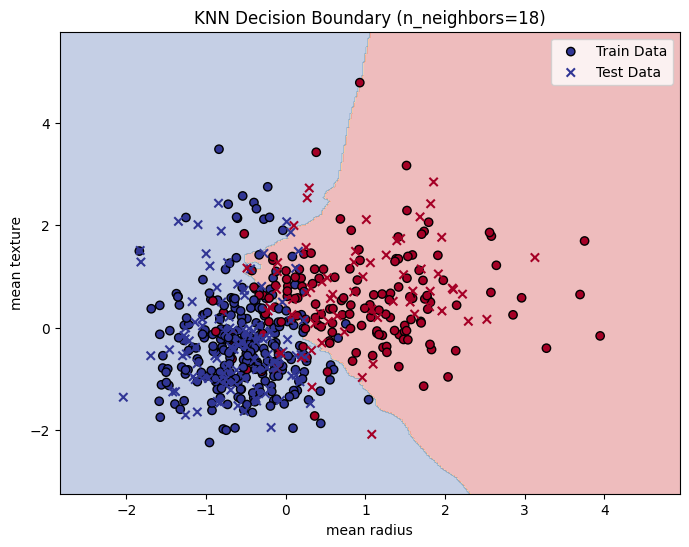

In [10]:
h = 0.02  # ukuran langkah grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k', label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, marker='x', label='Test Data')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title(f"KNN Decision Boundary (n_neighbors={n_neighbors})")
plt.legend()
plt.show()

In [11]:
print("\nAnalisis Generalisasi:")
if abs(train_acc - test_acc) < 0.05 and test_acc > 0.85:
    print("✅ Model menunjukkan GOOD GENERALIZATION (hasil seimbang antara train dan test).")
elif train_acc > test_acc + 0.1:
    print("⚠️ Model kemungkinan OVERFITTING (terlalu menyesuaikan data latih).")
elif test_acc < 0.75:
    print("⚠️ Model kemungkinan UNDERFITTING (tidak cukup belajar dari data).")
else:
    print("ℹ️ Model dalam kondisi cukup stabil, namun bisa ditingkatkan.")


Analisis Generalisasi:
✅ Model menunjukkan GOOD GENERALIZATION (hasil seimbang antara train dan test).
